# LeDebruiteur
* Jonas Freiburghaus
* Romain Capocasale
* He-Arc, INF3dlm-a
* Image Processing course
* 2019-2020

## Noise Reduction Standard Methods

This notebook contains the different methods of noise reduction used as standard in the field of image processing

In [13]:
from debruiteur.generator.datagenerator import DataGenerator
from debruiteur.plots.plots import *
from debruiteur.preprocessing.preprocessor import *
from debruiteur.noise.noise import *
from debruiteur.utils.utils import load_model, split_train_val_df
from debruiteur.noise.noisereduction import *

### Noise type

In [4]:
noise_class_list = [
    GaussianNoise(mean=0, std=10),
    PoissonNoise(),
    UniformNoise(amplitude=100),
    SaltPepperNoise(freq=0.3),
    SquareMaskNoise(mask_shape=(10, 10), freq=0.1),
    SpeckleNoise(),
    AveragingBlurNoise(),
    GaussianBlurNoise(),
    MedianBlurNoise()
]

### Load data

In [5]:
working_dir = os.path.abspath(os.getcwd())

df_original = make_original_dataframe(os.path.join(working_dir, "images"))
df_resized = make_resized_dataframe(df_original, img_shape=(100, 100), resized_path=os.path.join(working_dir, "resized_images"))
df_noised = make_noised_dataframe(df_resized, noise_class_list, os.path.join(working_dir, "noised_images"))

### Standard noise reduction methods

In [11]:
img_gen = DataGenerator(df_noised)

#### Wiener filter

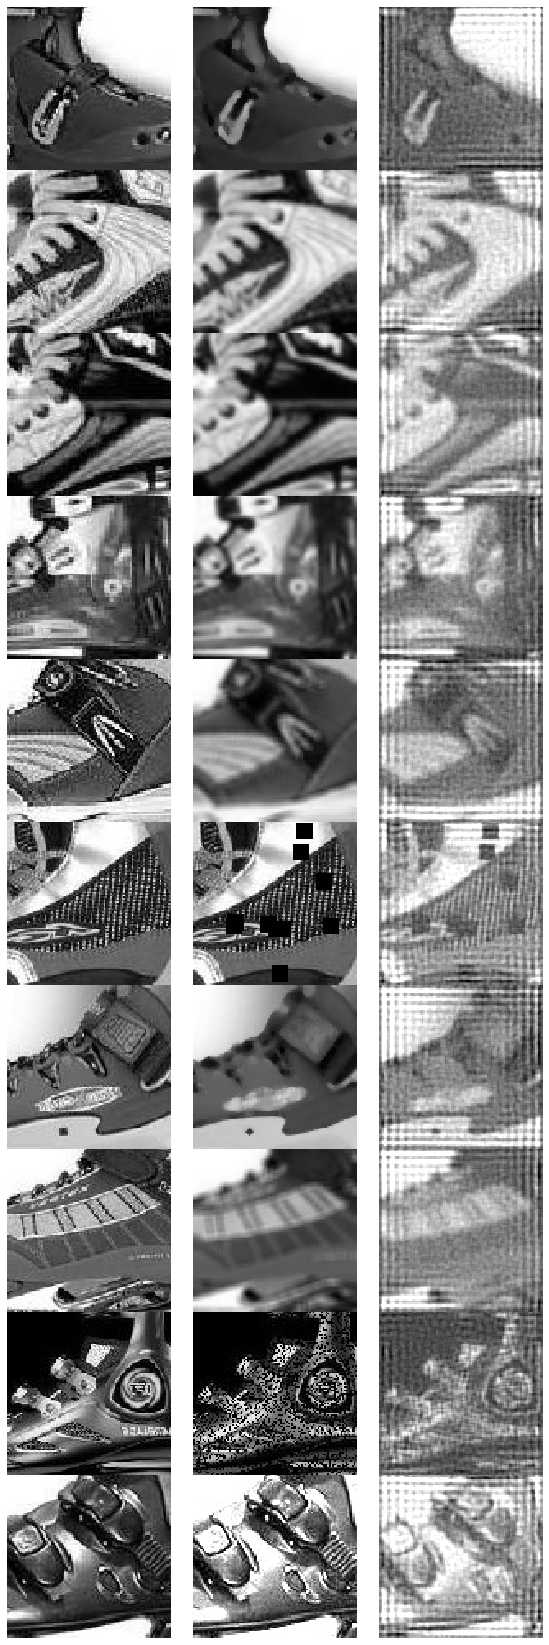

In [14]:
plot_result_comparison_standard_method(lambda x:wiener_filter(x.reshape((100,100))), img_gen)

#### Laplacian filter

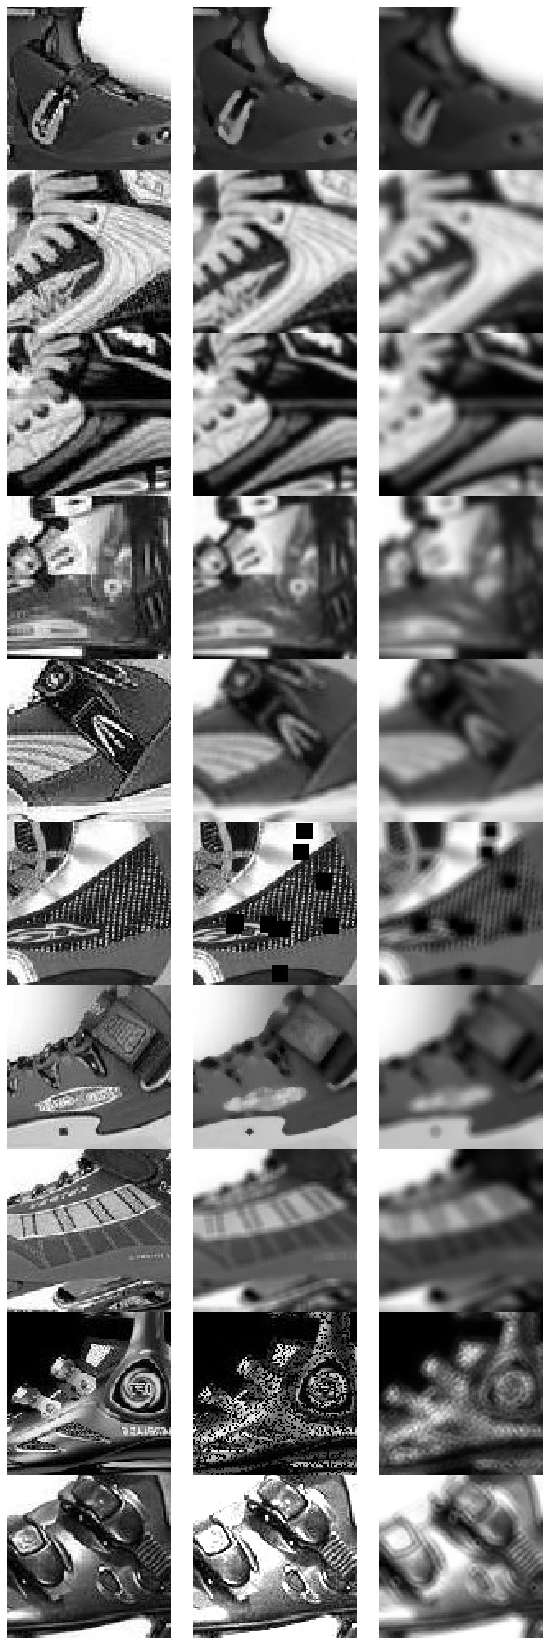

In [15]:
plot_result_comparison_standard_method(laplacian_filter, img_gen)

#### Gaussian weighted substract filter

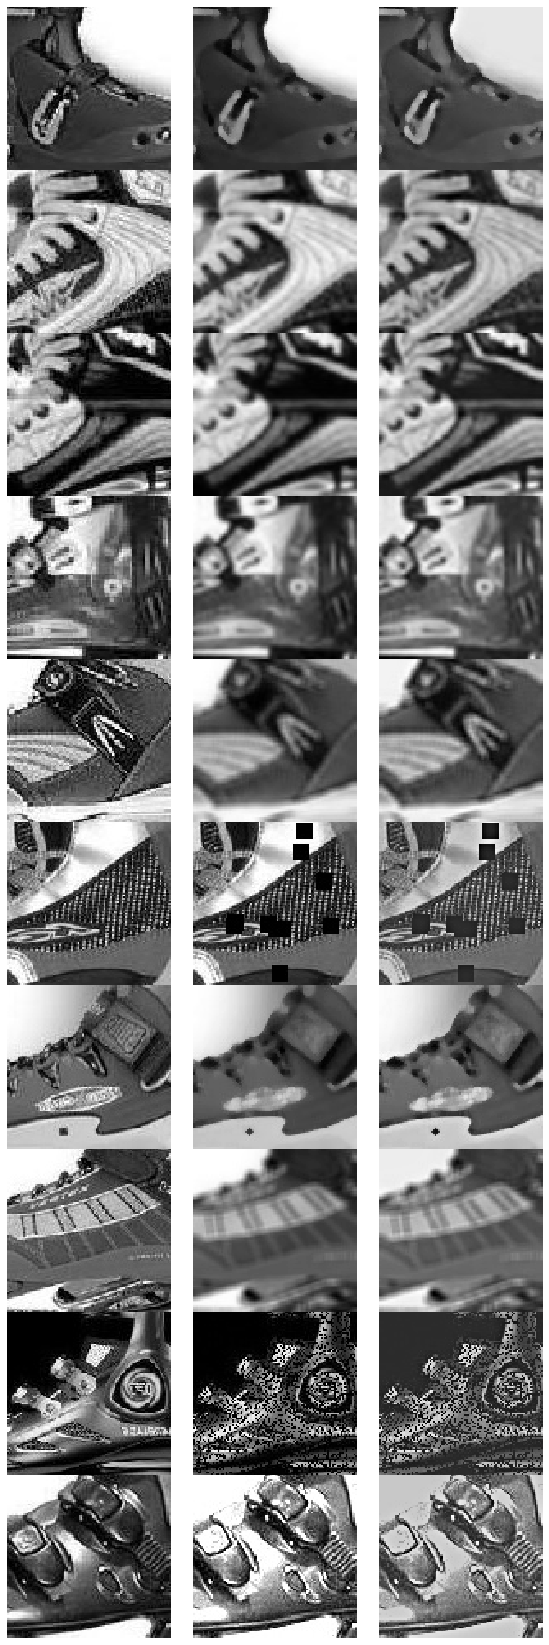

In [16]:
plot_result_comparison_standard_method(gaussian_weighted_substract_filter, img_gen)

#### Mean filter

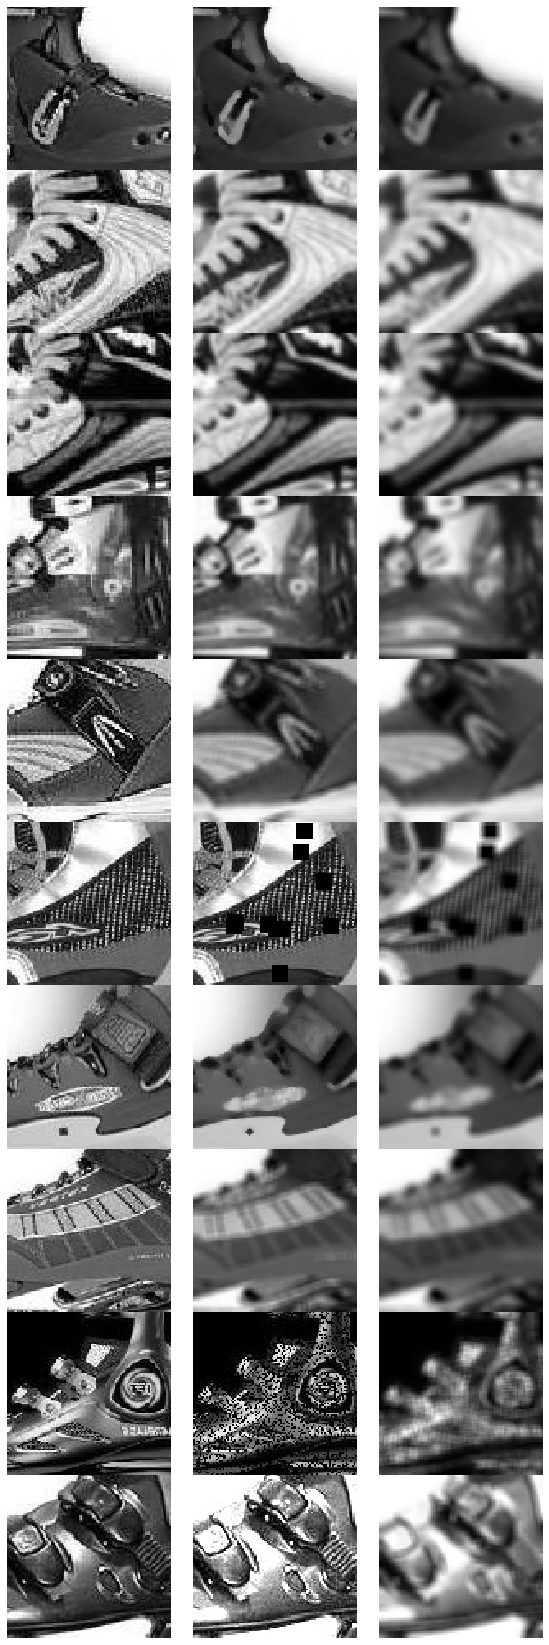

In [17]:
plot_result_comparison_standard_method(mean_filter, img_gen)

#### Median filter


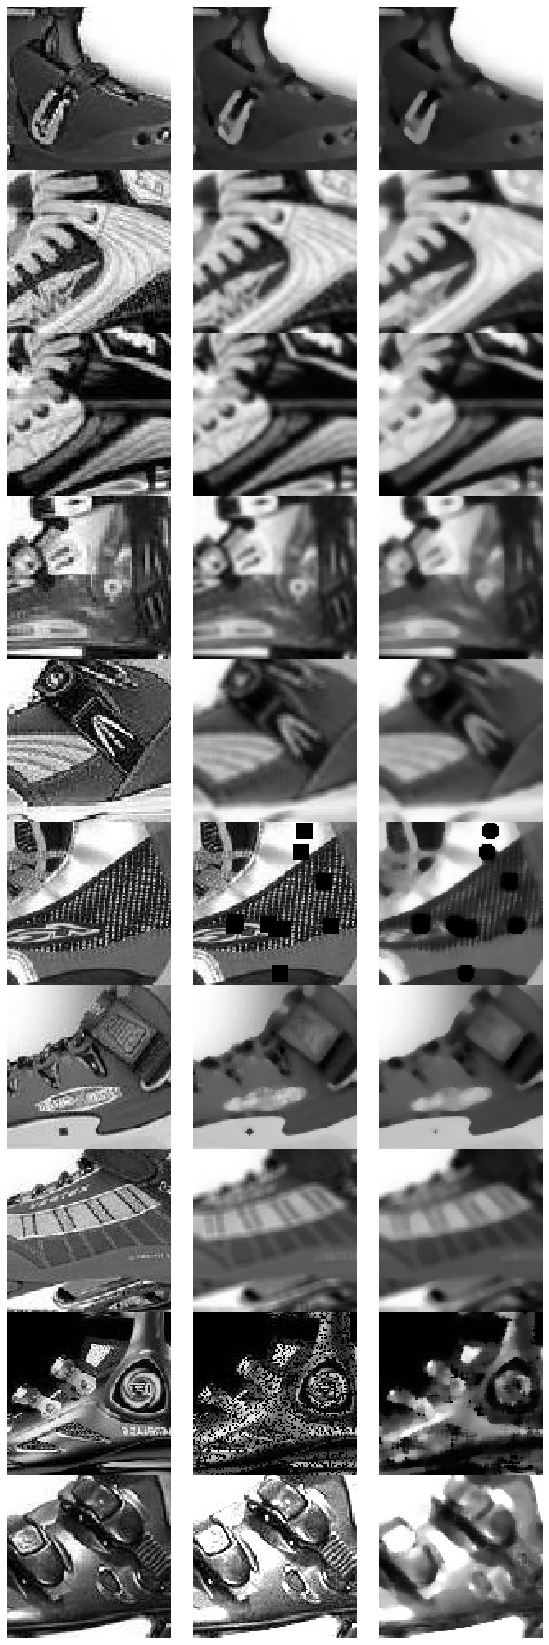

In [18]:
plot_result_comparison_standard_method(median_filter, img_gen)

#### Conservative filter

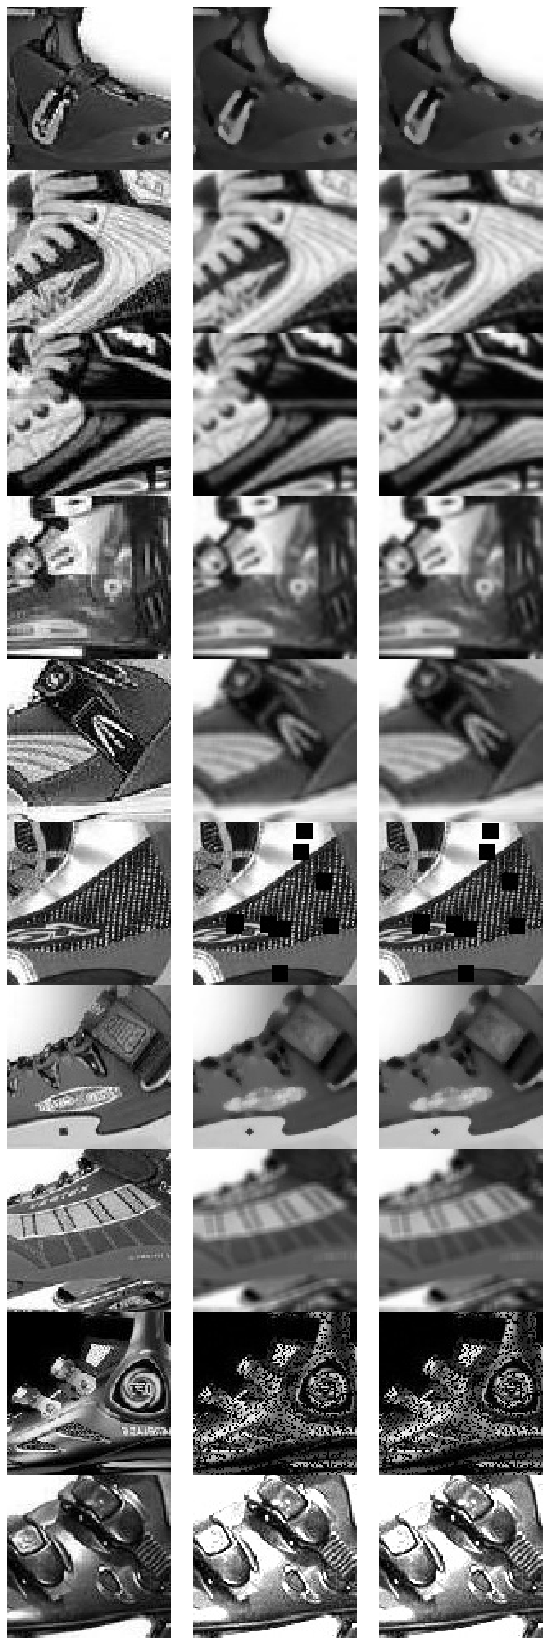

In [20]:
plot_result_comparison_standard_method(lambda x:conservative_filter(x.reshape((100,100))), img_gen)

#### Fast Fourier Transform filter

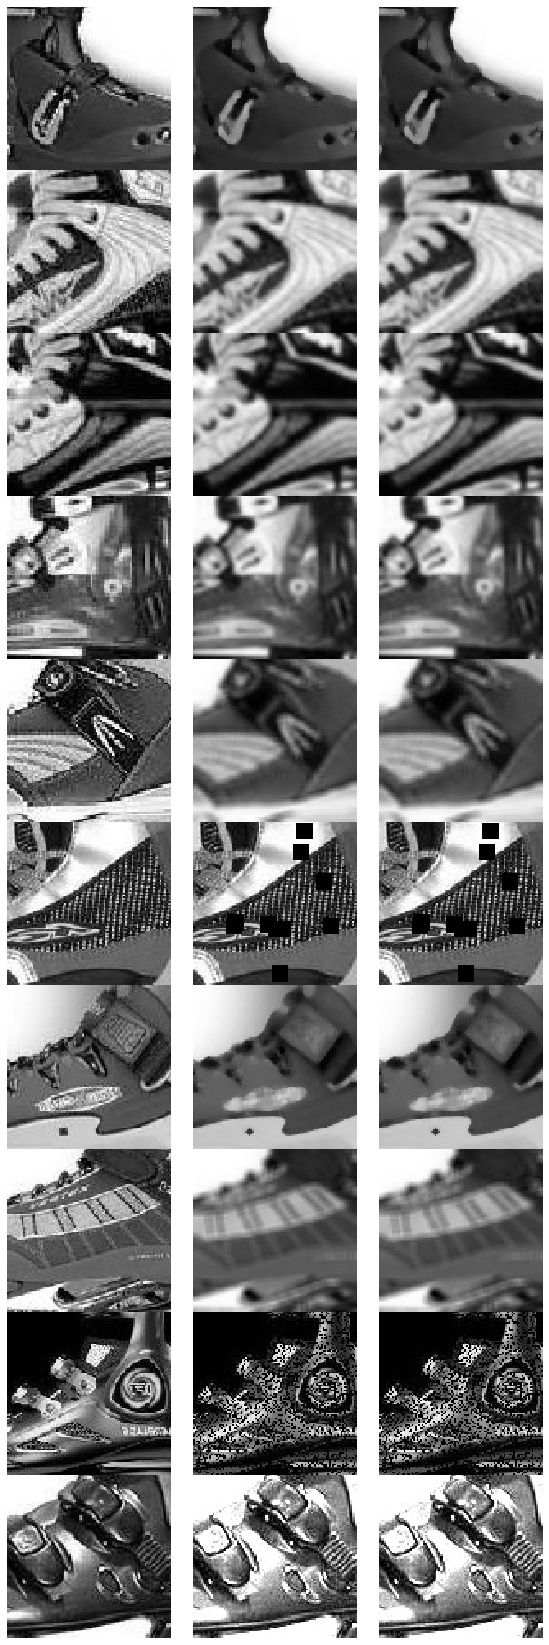

In [21]:
plot_result_comparison_standard_method(fft_filter, img_gen)